## Methodo de Euler-Maruyama

In [12]:
# Bibliotecas úteis
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"]

In [14]:
# Parâmetros da equação diferencial estocástica (EDE)
alpha, beta, X0 = -0.25, 0.5, 1

In [15]:
# Simulation parameters
T, N = 1, 2**7  # intervalo [0,T] e numero de incrementos brownianos
dt = 1.0 / N
t = np.arange(dt, 1 + dt, dt)  # Inicio em dt pois X = X0 em t = 0

In [16]:
# Movimento browniano
np.random.seed(1)
dW = np.sqrt(dt) * np.random.randn(N)
B  = np.cumsum(dW)

In [17]:
# EM - dt pequeno
X_em_small, X = [], X0
for j in range(N):  
    X += alpha*(X**3)*dt + beta*(X**2)*dW[j]
    X_em_small.append(X)

In [18]:
# EM - dt grande
X_em_big, X, R = [], X0, 2
coarse_grid = np.arange(dt,1+dt,R*dt)
for j in range(int(N/R)):
    X += alpha*(X**3)* (R*dt) + beta*(X**2)*sum(dW[R*(j-1):R*j])
    X_em_big.append(X) 

In [19]:
# Esperança para os parametros alpha, beta, X0 = -0.25, 0.5, 1
Y = -0.25*t+1

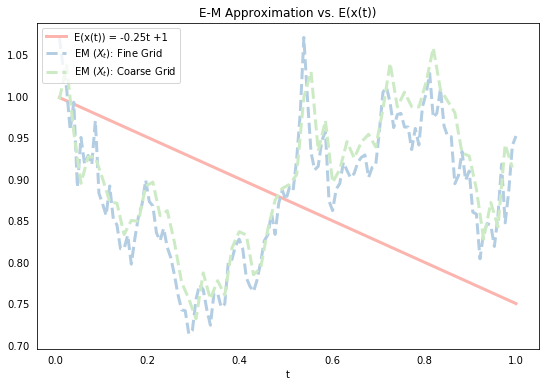

In [21]:
# Plot
plt.plot(t, Y, label="E(x(t)) = -0.25t +1", color=pal[0])
plt.plot(t, X_em_small, label="EM ($X_t$): Fine Grid", color=pal[1], ls='--')
plt.plot(coarse_grid, X_em_big, label="EM ($X_t$): Coarse Grid", color=pal[2], ls='--')
plt.title('E-M Approximation vs. E(x(t))'); plt.xlabel('t'); plt.legend(loc = 2);